# CBU5201 mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the genki4k dataset, build a machine learning pipeline that takes as an input an image and predicts 1) whether the person in the image is smiling or not 2) estimate the 3D head pose labels in the image.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the genki4k dataset (https://inc.ucsd.edu/mplab/398/). 

Your submission will consist of two Jupyter notebooks, one for the basic component and another one for advanced component. Please **name each notebook**:

* CBU5201_miniproject_basic.ipynb
* CBU5201_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks might not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  HengRui HU

**Student ID**:   QM:210983030       BUPT:2021213218



# 2 Problem formulation

**I want to solve the problem of machine learning is to identify the smiling face. This task involves developing a model, can automatically judge whether images of people with a smile. What's interesting about this problem is its application to computer vision and facial expression analysis.I think this has various practical applications in real life, including:**

1.Human-computer interaction. I want to create a system that automatically reacts based on a detected smile. This can be very interesting in a user interface or virtual assistant.

2.Sentiment analysis. I hope that my model can help to understand the emotional states of individuals. By identifying smiles, I can perform sentiment analysis in fields such as psychology and market research.

3.Biometrics. Facial features, including expressions, can be used for authentication. I thought that by recognizing smiles, Maybe I could improve the accuracy of the biometric system and thus enhance security.

In summary,I think that by developing an effective model to recognize smiling faces, I can make some interesting contributions to the field of computer vision and pattern recognition.At the same time, it is also of great help to the society.

# 3 Machine Learning pipeline

#### **1.Data loading and preprocessing:**

Input: Path to the image dataset folder and the text file path containing label information.

Processing steps: read the image data and corresponding labels, use the MTCNN model to cut out the face in the image (at the same time, discard the images that cannot be effectively cropped),resize the image to the  target size, save it to the folder "genki4kcutted", and adjust the labels (remove the labels corresponding to the abandoned images to avoid interference) to ensure that the images and labels match.

Output: The output contains the cropped image dataset and the corresponding label dataset in the form of NumPy arrays.

#### **2.Feature engineering:**

Input: The cropped image dataset and the corresponding label dataset in the form of NumPy arrays.

Processing steps: Divide the dataset into training set, validation set and test set according to the proportion of 60%, 20% and 20%. Normalization(Scales the image pixel values to the range [0, 1].),Use unique heat coding to converted the category labela to binary one-hot encoded form to fit the output of the neural network.

Output: Adjusted training set, validation set and test set.

#### **3.Model building and training(classification):**

Input: Adjusted training set and validation set. 

Processing steps: building a ConvNeXt model, using the SGD optimizer, set the learning rate to 0.001, select binary_crossentropy as loss function, use the early stop method and set the best model to save, compiling the model, train the model on the training set and using the validation set for validation.

Output: Trained classification model.


#### **3.Model building and training(regressionn):**

Input: Adjusted training set and validation set. 

Processing steps: building a ConvNeXt model, using the Adam optimizer, set the learning rate to 0.001, select mean_squared_error as loss function, use the early stop method and set the best model to save, compiling the model, train the model on the training set and using the validation set for validation.

Output: Trained regression model.


#### **4.Model evaluation:**

Input: Model and adjusted test set.

Output: Prediction results and model performance metrics.

# 4 Transformation stage

#### **1. Size cutting**

Input: A dataset containing images, each of which may have a different size and resolution.

Processing: MTCNN classifier are used for face detection and cropping, and the cropped face image is adjusted to the same target size (64,64).

Output: Resized image image contains the cropped face, and the size is the same.

Reasons for choosing this stage:
Machine learning models have certain requirements for consistency of input data, so images need to be adjusted to the same size to ensure that the model can handle fixed-size inputs. I used MTCNN model to crop faces, which can focus on facial features, reduce redundant information, and help improve model performance. The adjusted image size is relatively small, helping to reduce the complexity of the model and speed up training and inferencing.


#### **2. Data normalization and enhancement (classification)**

Input: Adjusted training set.

Processing: Image data is normalized, pixel values are scaled to a range of 0 to 1, and data enhancement is applied, including rotation, translation, clipping, scaling, and horizontal flipping.

Output: Normalized and enhanced training set for training a facial emotion classification model.

Reasons for choosing this stage:
Normalization ensures stability during model training and helps accelerate convergence. Data enhancement can improve the robustness of the model, allowing it to better generalize to different emotion expressions and image transformations.

# 5 Modelling

#### **1. Smile classification model:**

#### **Model name: ConvNeXt model (a convolutional neural network)**

#### **Model structure:**

1. Input layer: The input of the model is the image, specifying the size of the input image is 64x64 pixels and has 3 channels.

2. Convolution layer 1: Conv2D, set 32 convolution cores, use ReLU activation function.

3. Pooling layer 1: MaxPooling2D, using 2x2 for maximum pooling.

4. Convolution layer 2: Conv2D, set 64 convolution cores, use ReLU activation function.

5. Pooling layer 2: MaxPooling2D, using 2x2 for maximum pooling.

6. Convolution layer 3: Conv2D, set 128 convolution cores, use ReLU activation function.

7. Pooling Layer 3: MaxPooling2D, using 2x2 for maximum pooling.

8. Convolution layer 4: Conv2D, set 128 convolution cores, use ReLU activation function.

9. Pooling Layer 4: MaxPooling2D, using 2x2 for maximum pooling.

10. Flat layer: After convolution and pooling, the multi-dimensional output is flattened into a one-dimensional vector through the Flatten layer in order to connect to the fully connected layer.

11. Fully connected layer: contains 512 neurons and uses ReLU activation function.

12. Dense layer: contains 2 neurons and uses the Sigmoid activation function.

#### **Reasons for selection:**

1.ConvNext is a lightweight convolutional neural network structure proposed by FAIR, which can complete model training and reasoning in a relatively short time, and is very suitable for smile detection scenarios.

2.ConvNext uses multi-scale feature fusion, cavity convolution and other technologies to capture local and global features in images, and the semantic segmentation accuracy of the model is high, which is suitable for smile detection scenes.

3.ConvNeXt uses a hierarchical structure to help extract features at different levels,and has good generalization ability,which is very suitable for image classification tasks.

#### **2. 3D head pose regression model:**

#### **Model name: ConvNeXt model (a convolutional neural network)**

#### **Model structure:**

1. Input layer: The input of the model is the image, specifying the size of the input image is 64x64 pixels and has 3 channels.

2. Convolution layer 1: Conv2D, set 32 convolution cores, use ReLU activation function.

3. Pooling layer 1: MaxPooling2D, using 2x2 for maximum pooling.

4. Convolution layer 2: Conv2D, set 64 convolution cores, use ReLU activation function.

5. Pooling layer 2: MaxPooling2D, using 2x2 for maximum pooling.

6. Convolution layer 3: Conv2D, set 128 convolution cores, use ReLU activation function.

7. Pooling Layer 3: MaxPooling2D, using 2x2 for maximum pooling.

8. Convolution layer 4: Conv2D, set 128 convolution cores, use ReLU activation function.

9. Pooling Layer 4: MaxPooling2D, using 2x2 for maximum pooling.

10. Flat layer: After convolution and pooling, the multi-dimensional output is flattened into a one-dimensional vector through the Flatten layer in order to connect to the fully connected layer.

11. Fully connected layer: contains 512 neurons and uses ReLU activation function.

12. Dense layer: contains 3 neurons and uses the linear activation function.

#### **Reasons for selection:**

1.ConvNext is a lightweight convolutional neural network structure proposed by FAIR, which can complete model training and reasoning in a relatively short time, and is very suitable for 3D head pose regression.

2.ConvNeXt has designed a mechanism for multi-scale information aggregation, which can help the network understand the input data more fully. In regression tasks, sensitivity to features at different scales may be important for predicting continuous values. The semantic segmentation accuracy of the model is high, which is suitable for 3D head pose regression scenes.

3.ConvNeXt uses a hierarchical structure to help extract features at different levels,and has good generalization ability,which is very suitable for 3D head pose regression tasks.



# 6 Methodology

#### Training and verification methods:

#### **1. Data preprocessing:**
- Image resizing: Resize all images to the same size (64x64 pixels).

- Data enhancement: Enhance the training set image by rotation, translation, scaling, horizontal flip and other methods.

#### **2. Data division:**
- Divide the data set into training set, validation set and test set in a ratio of 60%/20%/20%.

#### **3. Model training:**

#### **Smile classification model:**
- Evaluate accuracy using SGD optimizer, set the learning rate to 0.001.

- Select "binary_crossentropy" as loss function.

- Use the early stop method and set the best model to save.

- Use the training set for training and use the validation set for validation.

- Model training rounds: 20 rounds.

#### **3D head pose regression model:**
- Evaluate the mean absolute error using the Adam optimizer.

- Select "mean_squared_error"  as loss function.

- Use the early stop method and set the best model to save.

- Use the training set for training and use the validation set for validation.

- Model training rounds: 20 rounds.
#### **4. Model performance evaluation:**

#### **Smile classification model:**
- Evaluate accuracy, precision, recall and F1 score on test sets.

- Draw loss curves and validation curves during training.

- Generate confusion matrices.

#### **3D head pose regression model:**
- Evaluate the Mean Squared Error and Mean Absolute Error on the test set.

- Draw loss curves and validation curves during training.

- Analyze the prediction effect of the model to see if the model accurately predicts the head coordinates.

#### **5. Result Analysis:**
- Analyze the model's performance on the test set and examine its ability to generalize.

- Adjust the model structure or hyperparameters according to the experimental results to optimize the model performance.


# 7 Dataset

### **Data source**
The GENKI-4K dataset was collected by the Machine Perception Laboratory at the University of California, San Diego. The dataset contains 4,000 images, each labeled with an expression (smile =1, non-smile =0) and a pose label (yaw, pitch, and roll, expressed in radians). The labels.txt" file contains these labels, and line N in the file corresponds to the NTH image in the "files" directory.

### **Face clipping**
After consulting the paper materials, I learned that MTCNN is a deep learning model that iterates through images, identifies facial features, outputs a rectangular bounding box containing face position information, cuts it out from the original image, and saves it to the output directory with the same file name, preserving the image format. In the pre-processing, I used MTCNN (multi-task Convolutional neural network) model to detect the face of the image in the original folder, and cut the detected smiley face and save it to the specified directory to achieve the face cutting.

So I discard the images that cannot be effectively cropped,save it to the folder "genki4kcutted".

In [3]:
import cv2
from mtcnn.mtcnn import MTCNN
import os

def crop_faces_in_folder(input_folder, output_folder, min_face_size=(20, 20), scale_factor=1.5):
    # Create an MTCNN model
    detector = MTCNN()

    # Get all image files in the folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Iterate over each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(input_folder, image_file)
        img = cv2.imread(image_path)

        # Detect faces
        faces = detector.detect_faces(img)

        # Iterate over detected faces
        for i, face_info in enumerate(faces):
            x, y, w, h = face_info['box']

            # Crop the face
            face = img[y:y + h, x:x + w]

            # Save the cropped face to the output directory
            output_file = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}.jpg")
            cv2.imwrite(output_file, face)

if __name__ == "__main__":
    input_folder = "genki4k/files"  # image folder path
    output_folder = "genki4kcutted"  # output directory

    # Create the output directory
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Call the function for face detection and cropping
    crop_faces_in_folder(input_folder, output_folder, min_face_size=(20, 20), scale_factor=1.5)
    print("Finish!")


Finish!


After that, I adjust the labels (remove the labels corresponding to the abandoned images to avoid interference) to ensure that the images and labels match.

### **Dear Professor, the labels.txt is the version that has been processed,so please do not run this program again, which will cause data loss, thank you Professor!**


In [2]:
import os
def read_labels_from_file(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    labels = [line.strip() for line in lines]
    return labels


def update_label_file(label_file, labels):
    with open(label_file, 'w') as f:
        f.write('\n'.join(labels))


def find_and_remove_missing_images(image_folder, label_file):
    labels = read_labels_from_file(label_file)
    updated_labels = []

    for i, label in enumerate(labels, start=1):
        image_name = f'file{i:04d}.jpg'

        if os.path.exists(os.path.join(image_folder, image_name)):
            updated_labels.append(label)
        else:
            print(f"Image {image_name} not found. Removing corresponding label.")

    update_label_file(label_file, updated_labels)


image_folder_path = "genki4kcutted"
label_file_path = "labels.txt"

find_and_remove_missing_images(image_folder_path, label_file_path)

Image file0002.jpg not found. Removing corresponding label.
Image file0017.jpg not found. Removing corresponding label.
Image file0024.jpg not found. Removing corresponding label.
Image file0026.jpg not found. Removing corresponding label.
Image file0035.jpg not found. Removing corresponding label.
Image file0063.jpg not found. Removing corresponding label.
Image file0065.jpg not found. Removing corresponding label.
Image file0092.jpg not found. Removing corresponding label.
Image file0095.jpg not found. Removing corresponding label.
Image file0101.jpg not found. Removing corresponding label.
Image file0131.jpg not found. Removing corresponding label.
Image file0172.jpg not found. Removing corresponding label.
Image file0183.jpg not found. Removing corresponding label.
Image file0193.jpg not found. Removing corresponding label.
Image file0203.jpg not found. Removing corresponding label.
Image file0209.jpg not found. Removing corresponding label.
Image file0210.jpg not found. Removing c

### **Then,I  completed all my preparatory work and the final dataset file can be seen in the attachment I submitted.**

# 8 Results

Then, I conduct the experiment.

#### **1. Smile classification**




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)       

c:\Users\HengRui Hu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


554/554 [==============================] - 3s 6ms/step - loss: 0.6876 - accuracy: 0.5359 - val_loss: 0.6836 - val_accuracy: 0.5467
Epoch 3/40
554/554 [==============================] - 3s 6ms/step - loss: 0.6848 - accuracy: 0.5549 - val_loss: 0.6804 - val_accuracy: 0.5467
Epoch 4/40
554/554 [==============================] - 3s 6ms/step - loss: 0.6799 - accuracy: 0.5625 - val_loss: 0.6707 - val_accuracy: 0.5656
Epoch 5/40
554/554 [==============================] - 3s 5ms/step - loss: 0.6644 - accuracy: 0.6036 - val_loss: 0.6325 - val_accuracy: 0.6401
Epoch 6/40
554/554 [==============================] - 3s 6ms/step - loss: 0.5999 - accuracy: 0.6862 - val_loss: 0.5497 - val_accuracy: 0.7267
Epoch 7/40
554/554 [==============================] - 3s 5ms/step - loss: 0.5096 - accuracy: 0.7616 - val_loss: 0.4788 - val_accuracy: 0.7903
Epoch 8/40
554/554 [==============================] - 3s 5ms/step - loss: 0.4457 - accuracy: 0.8122 - val_loss: 0.4529 - val_accuracy: 0.8078
Epoch 9/40
554/55

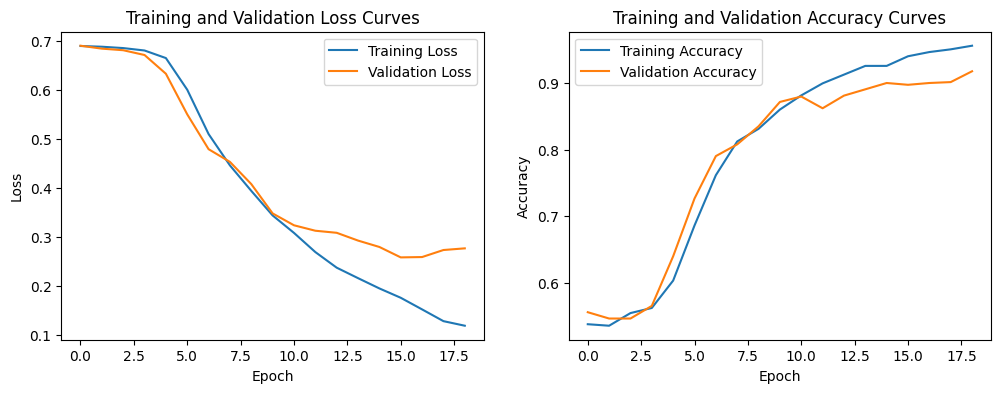

24/24 [==============================] - 0s 9ms/step - loss: 0.2361 - accuracy: 0.9120
Test accuracy: 0.9120432734489441
24/24 [==============================] - 0s 8ms/step
Classification Precision: 0.9416058394160584
Classification Recall: 0.9042056074766355
Classification F1 Score: 0.9225268176400476
Classification Confusion Matrix:
[[287  24]
 [ 41 387]]


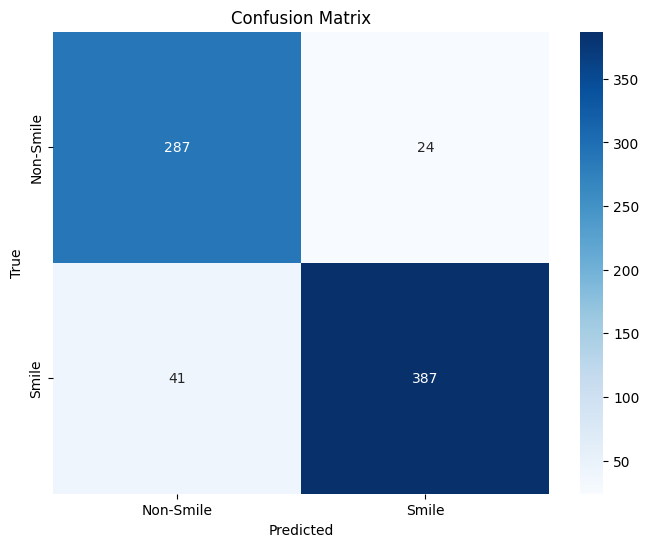

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras import models, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset function
def load_dataset(folder, label_file):
    images = []
    labels = []

    with open(label_file, 'r') as f:
        lines = f.readlines()

    for file, line in zip(os.listdir(folder), lines):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (64, 64))
            images.append(image)

            # Get the classification label
            label = int(line.split()[0])
            labels.append(label)

    return np.array(images), np.array(labels)

# Dataset paths
data_folder = "genki4kcutted"  # Dataset folder path
label_file = "labels.txt"  # Text file path containing label information

# Load classification dataset
X, y = load_dataset(data_folder, label_file)

# Split dataset into training, validation, and test sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocess classification data
X_train = X_train / 255.0  # Normalize to [0, 1]
X_val = X_val / 255.0
X_test = X_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)  # One-hot encode
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Build ConvNeXt model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

# Use SGD optimizer, set learning rate
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set up model checkpoint
model_checkpoint = ModelCheckpoint(filepath='best_model_convNext.h5', save_best_only=True)

# Train the model and plot training/validation loss curves
history = model.fit(X_train, y_train, epochs=40, batch_size=4, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Plot training/validation loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')

# Plot training/validation accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Curves')

plt.show()

# Evaluate the classification model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Make classification predictions
y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate other classification metrics
precision = precision_score(np.argmax(y_test, axis=1), y_pred_binary)
recall = recall_score(np.argmax(y_test, axis=1), y_pred_binary)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred_binary)

print(f'Classification Precision: {precision}')
print(f'Classification Recall: {recall}')
print(f'Classification F1 Score: {f1}')

# Calculate classification confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_binary)
print('Classification Confusion Matrix:')
print(conf_matrix)

# Use seaborn to plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Smile', 'Smile'], yticklabels=['Non-Smile', 'Smile'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



### **The result is good.**

### **Test accuracy: 0.9120432734489441**

Classification Precision: 0.9416058394160584

Classification Recall: 0.9042056074766355

Classification F1 Score: 0.9225268176400476


Classification Confusion Matrix:

[[287  24]

 [ 41 387]]

#### **2. 3D head pose regression:**

Epoch 1/40
554/554 [==============================] - 4s 6ms/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1037 - mape: 431705.4375 - cosine_similarity: 0.5241 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0817 - val_mape: 379192.8125 - val_cosine_similarity: 0.6910
Epoch 2/40
 33/554 [>.............................] - ETA: 2s - loss: 0.0130 - mse: 0.0130 - mae: 0.0798 - mape: 354201.6875 - cosine_similarity: 0.7792

c:\Users\HengRui Hu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


554/554 [==============================] - 3s 6ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0783 - mape: 521306.4375 - cosine_similarity: 0.7519 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0715 - val_mape: 458143.0000 - val_cosine_similarity: 0.7577
Epoch 3/40
554/554 [==============================] - 3s 6ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0710 - mape: 520884.5938 - cosine_similarity: 0.7809 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0670 - val_mape: 384298.1250 - val_cosine_similarity: 0.7666
Epoch 4/40
554/554 [==============================] - 4s 8ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0680 - mape: 581999.7500 - cosine_similarity: 0.7906 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0675 - val_mape: 465768.2188 - val_cosine_similarity: 0.7784
Epoch 5/40
554/554 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0654 - mape: 478312.9688 - cosine_similarity: 0.8085 - val_loss: 0.0087 - val_mse: 0.0087 - val_mae: 0.

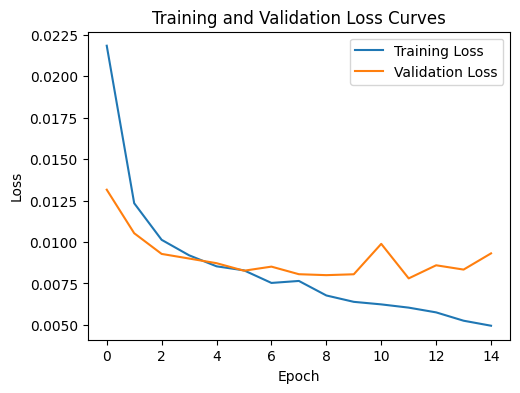

In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras import models, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load regression dataset function
def load_regression_dataset(folder, label_file):
    images = []
    labels = []

    with open(label_file, 'r') as f:
        lines = f.readlines()

    for file, line in zip(os.listdir(folder), lines):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (64, 64))
            images.append(image)

            # Get regression labels
            label_parts = list(map(float, line.split()[1:]))
            labels.append(label_parts)

    return np.array(images), np.array(labels)

# Dataset paths
data_folder = "genki4kcutted"  # Dataset folder path
label_file = "labels.txt"  # Text file path containing label information

# Load regression dataset
X_reg, y_reg = load_regression_dataset(data_folder, label_file)

# Split dataset into training, validation, and test sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocess regression data
X_train = X_train / 255.0  # Normalize to [0, 1]
X_val = X_val / 255.0
X_test = X_test / 255.0
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Build regression model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='linear'))  # Linear activation function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape', 'cosine_similarity'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set up model checkpoint
model_checkpoint = ModelCheckpoint(filepath='best_model_convNext_re.h5', save_best_only=True)

# Train regression model and plot training/validation loss curves
history = model.fit(X_train, y_train, epochs=40, batch_size=4, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

# Plot training/validation loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')

# Evaluate regression model
y_pred_reg = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
mae = np.mean(np.abs(y_test - y_pred_reg))

print(f'Mean Squared Error on Test Set: {mse}')
print(f'Mean Absolute Error on Test Set: {mae}')



### **The result is good.**
### Mean Squared Error on Test Set: 0.008207463264791106

### Mean Absolute Error on Test Set: 0.06349973196482848

# 9 Conclusions

### **Classification task result analysis**
- The classification accuracy is over 91%, and other indicators are also excellent. 
- Further consideration can be given to optimizing the model structure or adjusting learning_rate, batch_size and other parameters.

### **Regression task result analysis**
- MAE and MSE are smaller, indicating that the model performs better in predicting coordinate values.
- The small loss value indicates that the model has a good fit for the regression task.

### **Overall evaluation**
- The ConvNeXt model performed reasonably well on both classification and regression tasks, indicating that the models were able to learn and generalize efficiently.
- Data enhancement slightly reduces performance on classification tasks, but overall performance is still good.

### **Future improvement measures**
- I would like to try to further optimize the classification model by introducing self-attention mechanisms to adjust hyperparameters and increase the complexity of the model.